In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])
origData = np.random.multivariate_normal(mu, sigma, size=(1000))
plt.scatter(*origData.T)
plt.show()

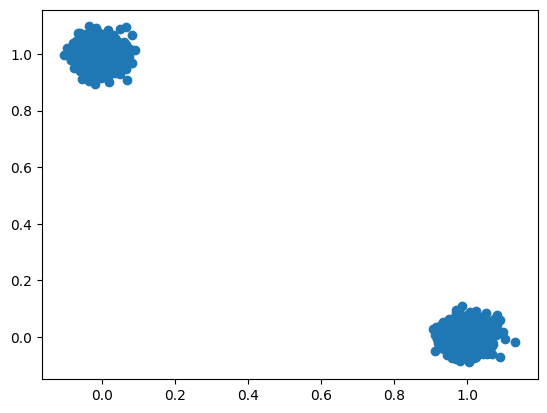

In [164]:
sigma = np.array([[0.001,0], [0,0.001]])

mu = np.array([1,0])
origData1 = np.random.multivariate_normal(mu, sigma, size=(1000))

mu = np.array([0,1])
origData2 = np.random.multivariate_normal(mu, sigma, size=(1000))

origData = np.vstack([origData1, origData2])
plt.scatter(*origData.T)
plt.show()

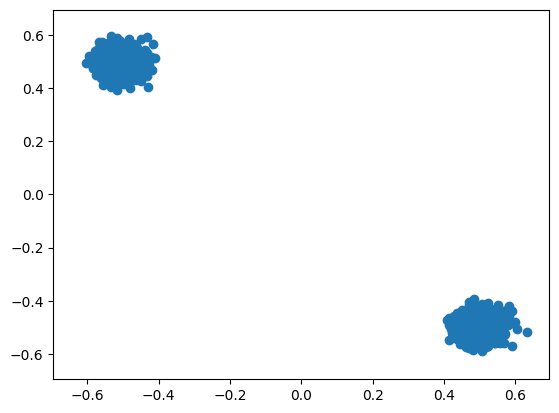

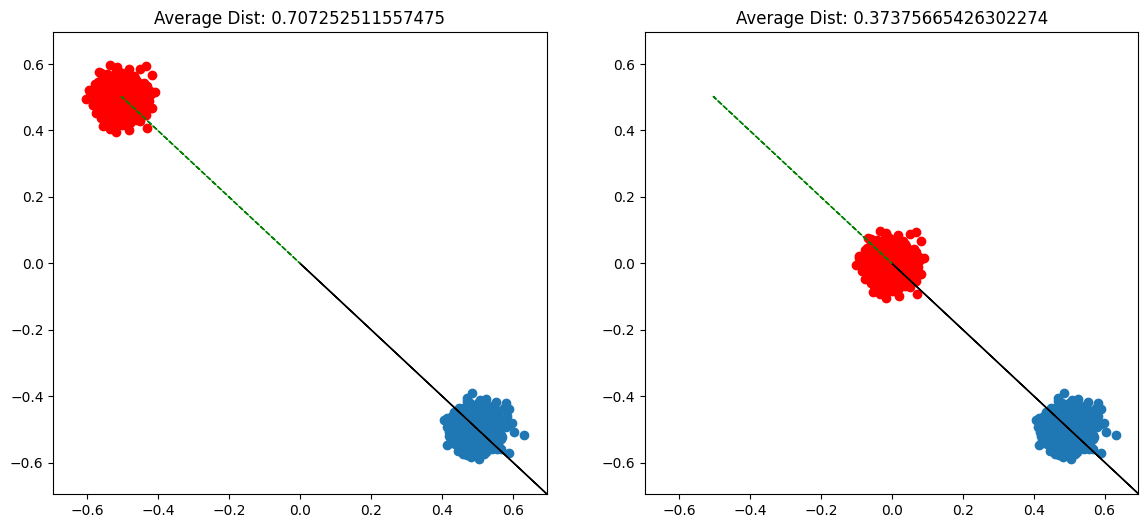

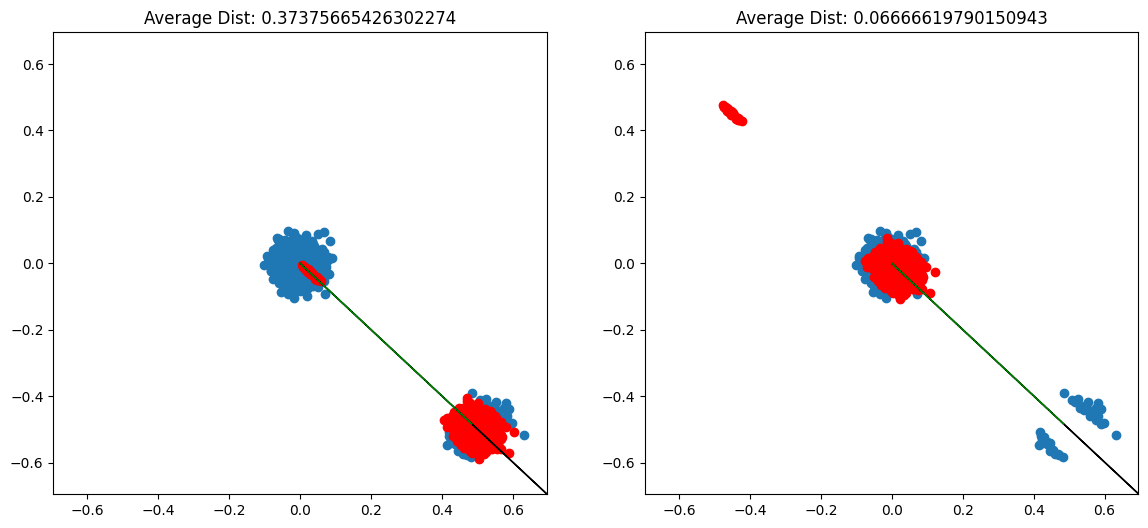

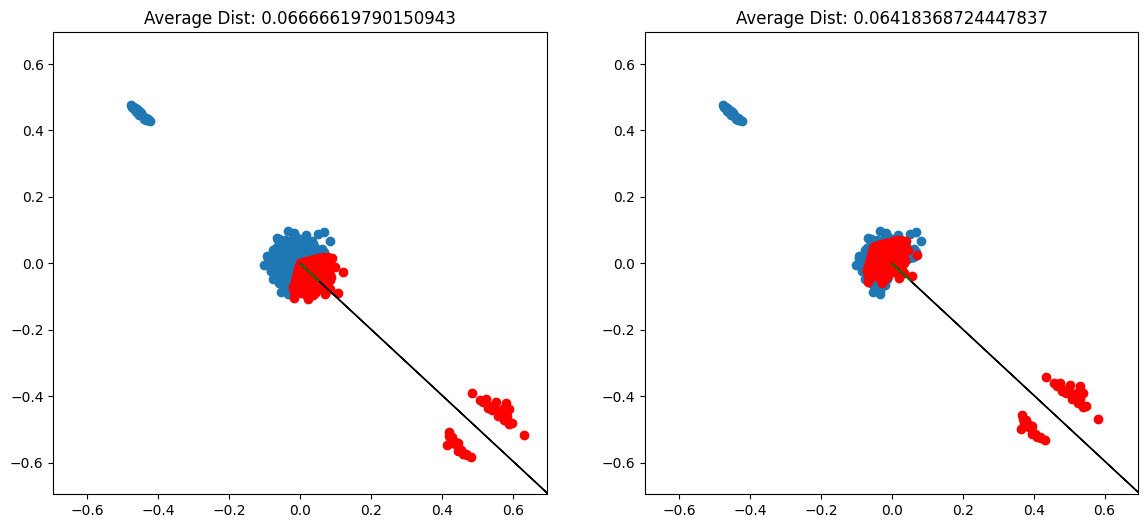

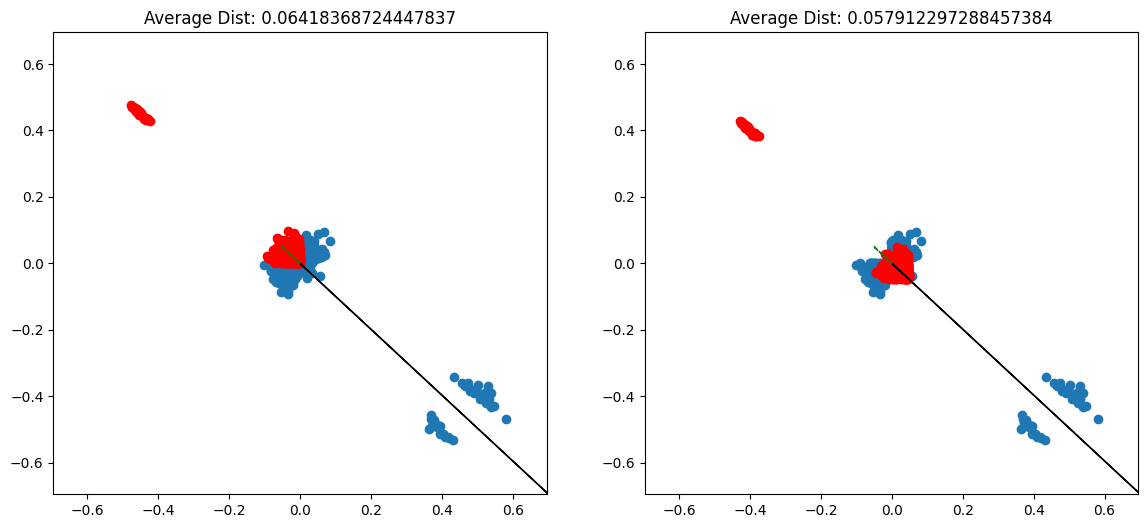

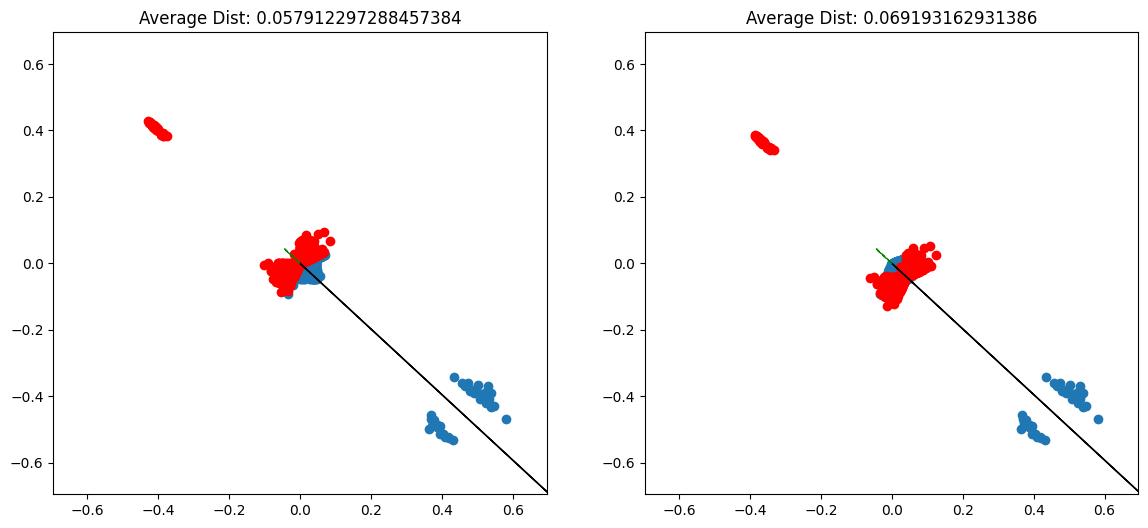

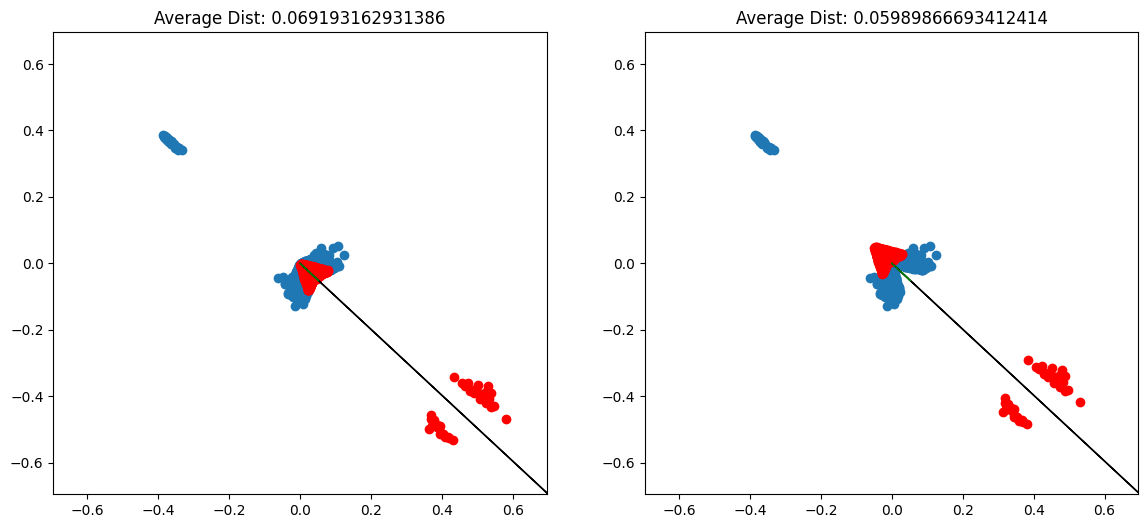

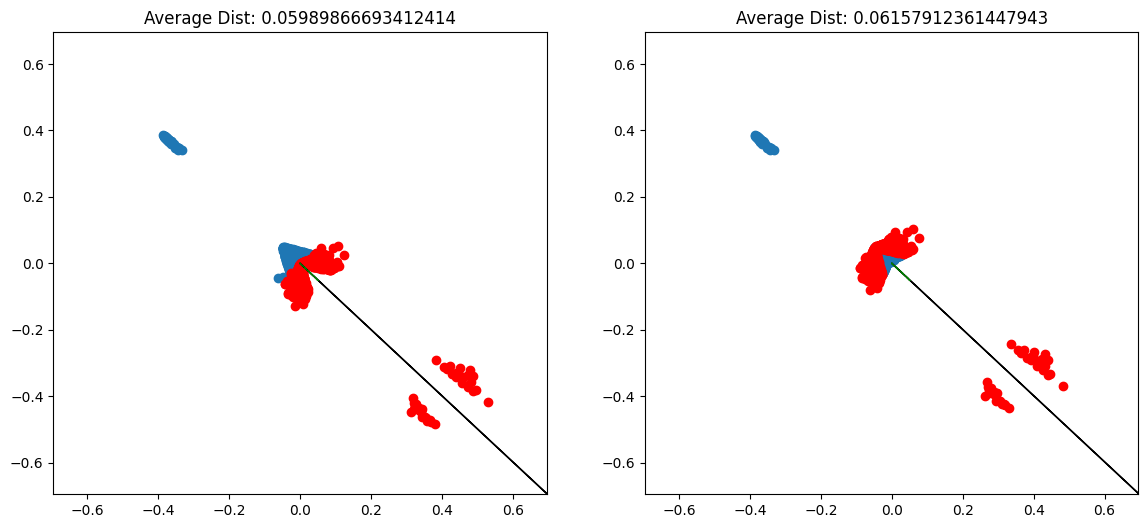

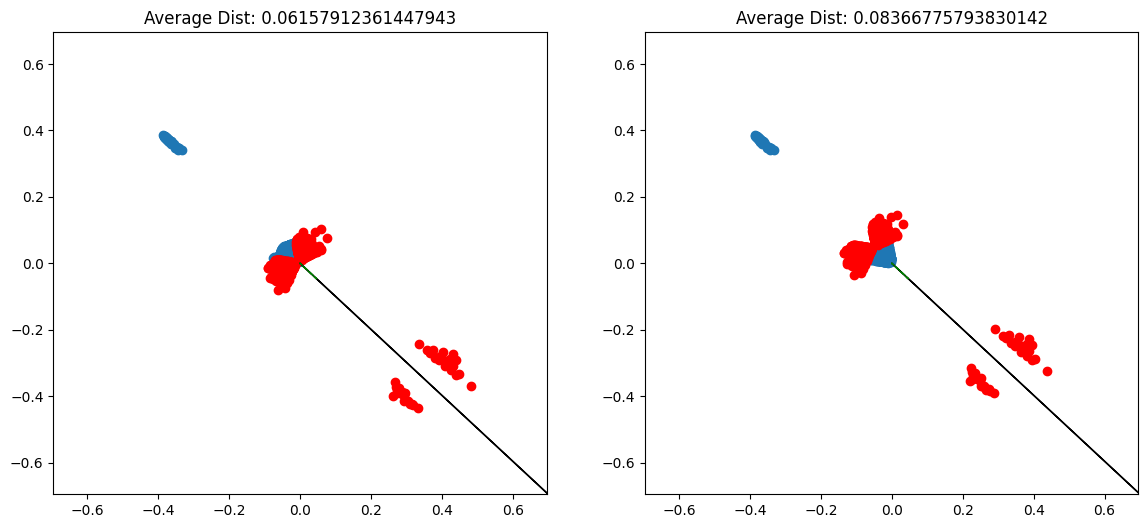

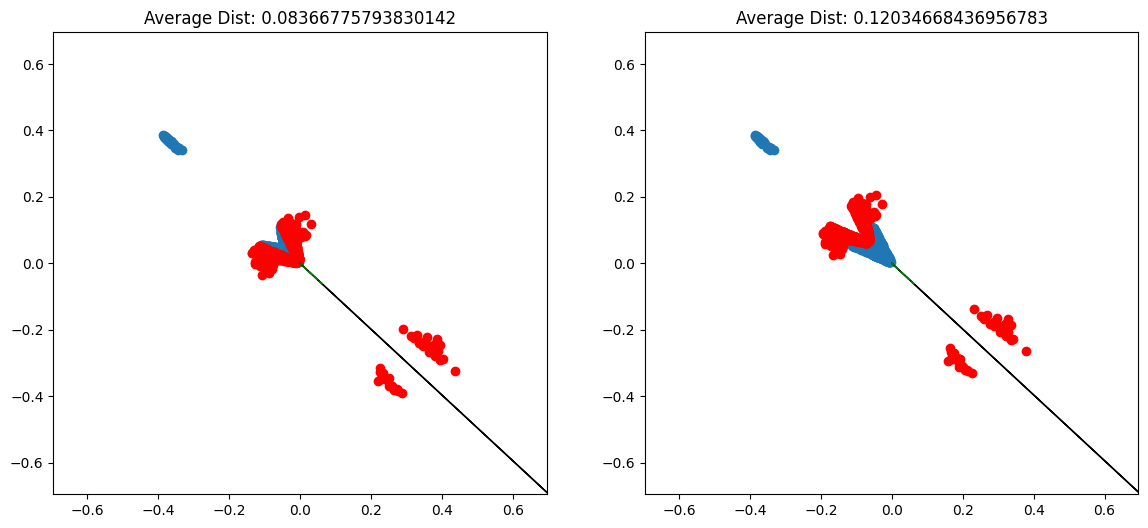

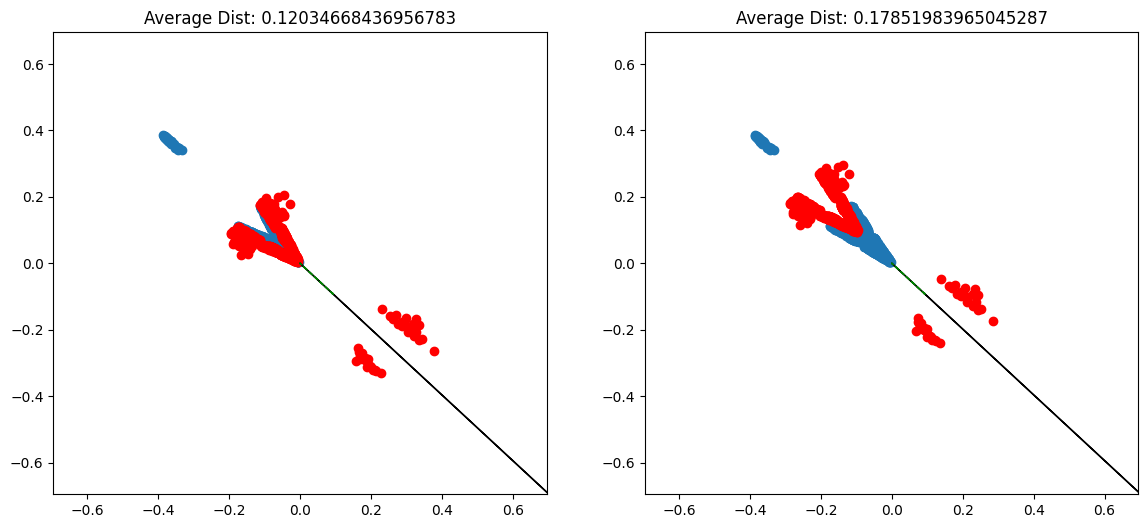

In [167]:
data = origData.copy()
data = data-np.mean(data, axis=0)

lim = 1.1*np.max(np.abs(data))
plt.xlim((-lim, lim))
plt.ylim((-lim, lim))
plt.scatter(*data.T)
plt.show()

numComponents = 10
numItems, originalDimension = data.shape
components = np.zeros(shape=(numComponents, originalDimension))
coefficients = np.zeros(shape=(numItems, numComponents))
SUBSET_FRAC = 0.5

for componentIndex in range(numComponents):
    covMatrix = np.cov(data.T)
    eigenValues, eigenVectors = np.linalg.eig(covMatrix)
    maxEigenValueIndex = np.argmax(eigenValues)
    maxVarianceDirection = eigenVectors[:, maxEigenValueIndex]

    # Check similarity for forward vector
    similarities = np.dot(data, maxVarianceDirection) / np.linalg.norm(data, axis=1)
    argsortedSimilarities = np.argsort(similarities)

    mostForwardAlignedVectorIndices = argsortedSimilarities[-int(SUBSET_FRAC*len(data)):]
    mostForwardAlignedVectors = data[mostForwardAlignedVectorIndices]
    mostForwardAlignedVectorsAverageLength = np.average(np.linalg.norm(mostForwardAlignedVectors, axis=1))

    # Check similarity for backward vector
    mostBackwardAlignedVectorIndices = np.argsort(similarities)[:int(SUBSET_FRAC*len(data))]
    mostBackwardAlignedVectors = data[mostBackwardAlignedVectorIndices]
    mostBackwardAlignedVectorsAverageLength = np.average(np.linalg.norm(mostBackwardAlignedVectors, axis=1))

    if mostForwardAlignedVectorsAverageLength > mostBackwardAlignedVectorsAverageLength:
        mostAlignedDataIndices = mostForwardAlignedVectorIndices
        componentDirection = maxVarianceDirection
    else:
        mostAlignedDataIndices = mostBackwardAlignedVectorIndices
        componentDirection = -maxVarianceDirection
    
    mostAlignedVectors = data[mostAlignedDataIndices]
    component = np.average(np.linalg.norm(mostAlignedVectors, axis=1), axis=0) * componentDirection

    # plt.scatter(*data.T)
    fig, (ax0, ax1) = plt.subplots(figsize=(14,6), ncols=2)
    ax0.set_xlim((-lim, lim))
    ax0.set_ylim((-lim, lim))
    ax0.scatter(*np.delete(data, mostAlignedDataIndices, axis=0).T)
    ax0.scatter(*data[mostAlignedDataIndices].T, color="r")
    ax0.arrow(0,0,*maxVarianceDirection, color="k")
    ax0.arrow(0,0,*component, color="g", linestyle="--")
    ax0.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")

    data[mostAlignedDataIndices] -= component

    ax1.set_xlim((-lim, lim))
    ax1.set_ylim((-lim, lim))
    ax1.scatter(*np.delete(data, mostAlignedDataIndices, axis=0).T)
    ax1.scatter(*data[mostAlignedDataIndices].T, color="r")
    ax1.arrow(0,0,*maxVarianceDirection, color="k")
    ax1.arrow(0,0,*component, color="g", linestyle="--")
    ax1.set_title(f"Average Dist: {np.average(np.linalg.norm(data, axis=1))}")
    plt.show()
